<a href="https://colab.research.google.com/github/sejhig2/machineLearning_HONGONG_machine_propeller/blob/main/9_3_LSTM%EA%B3%BC_GRU_%EC%85%80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM과 GRU 셀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## LSTM 신경망 훈련하기

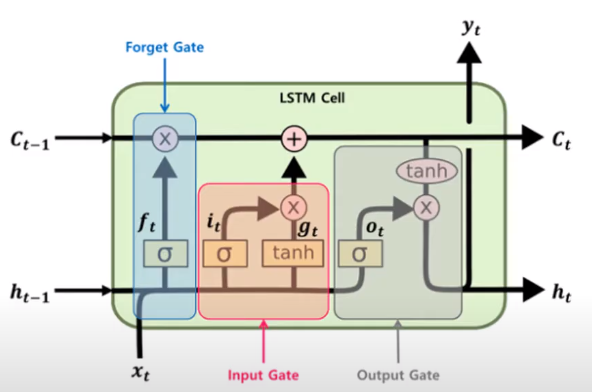

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6922 - accuracy: 0.5533 - val_loss: 0.6911 - val_accuracy: 0.6048
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6887 - accuracy: 0.6351 - val_loss: 0.6858 - val_accuracy: 0.6614
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6762 - accuracy: 0.6585 - val_loss: 0.6608 - val_accuracy: 0.7042
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6316 - accuracy: 0.7230 - val_loss: 0.6094 - val_accuracy: 0.7304
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5920 - accuracy: 0.7376 - val_loss: 0.5852 - val_accuracy: 0.7358
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5688 - accuracy: 0.7473 - val_loss: 0.5647 - val_accuracy: 0.7400
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5503 - accuracy: 0.7570 - val_loss: 0.5553 - val_accuracy:

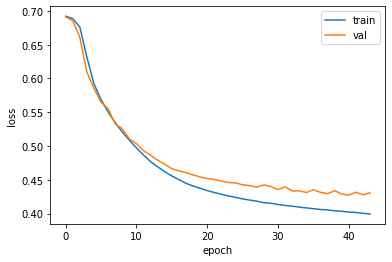

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6927 - accuracy: 0.5265 - val_loss: 0.6922 - val_accuracy: 0.5604
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6912 - accuracy: 0.5816 - val_loss: 0.6902 - val_accuracy: 0.6114
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6883 - accuracy: 0.6204 - val_loss: 0.6860 - val_accuracy: 0.6348
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6815 - accuracy: 0.6464 - val_loss: 0.6762 - val_accuracy: 0.6514
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6639 - accuracy: 0.6626 - val_loss: 0.6436 - val_accuracy: 0.6788
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6057 - accuracy: 0.7071 - val_loss: 0.5754 - val_accuracy: 0.7306
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5670 - accuracy: 0.7308 - val_loss: 0.5526 - val_accuracy:

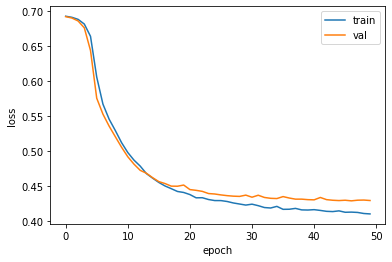

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6928 - accuracy: 0.5210 - val_loss: 0.6920 - val_accuracy: 0.5562
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6877 - accuracy: 0.5946 - val_loss: 0.6787 - val_accuracy: 0.6212
Epoch 3/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6373 - accuracy: 0.6827 - val_loss: 0.5950 - val_accuracy: 0.7142
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5743 - accuracy: 0.7220 - val_loss: 0.5557 - val_accuracy: 0.7364
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5417 - accuracy: 0.7400 - val_loss: 0.5249 - val_accuracy: 0.7534
Epoch 6/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5158 - accuracy: 0.7568 - val_loss: 0.5067 - val_accuracy: 0.7620
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 0.4977 - accuracy: 0.7677 - val_loss: 0.4899 - val_accuracy

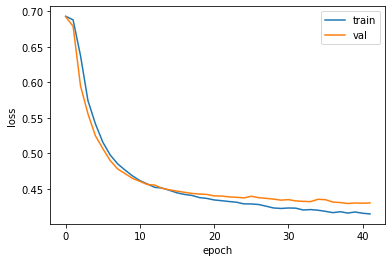

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6920 - accuracy: 0.5372 - val_loss: 0.6913 - val_accuracy: 0.5536
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6893 - accuracy: 0.5781 - val_loss: 0.6884 - val_accuracy: 0.5852
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6849 - accuracy: 0.6055 - val_loss: 0.6832 - val_accuracy: 0.6066
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6774 - accuracy: 0.6270 - val_loss: 0.6747 - val_accuracy: 0.6192
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6652 - accuracy: 0.6429 - val_loss: 0.6612 - val_accuracy: 0.6356
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6451 - accuracy: 0.6625 - val_loss: 0.6377 - val_accuracy: 0.6610
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6077 - accuracy: 0.6883 - val_loss: 0.5891 - val_accuracy:

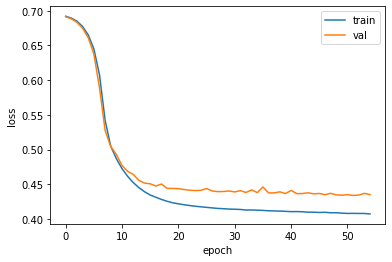

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 10s 13ms/step - loss: 0.4252 - accuracy: 0.8019


[0.42520672082901, 0.8019199967384338]